## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change your present working directory

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.utils import np_utils

### Load your data file

In [35]:
df = pd.read_csv('/content/drive/My Drive/NLP/daily-minimum-temperatures-in-me.csv')
df.sort_index(inplace=True)
df.tail(4)

,Date,Temperature
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [36]:
df.shape

(3650, 2)

#### Plot data

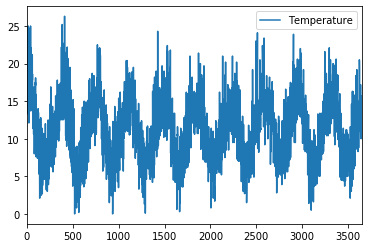

In [37]:
df.plot()

#### Descibe your dataframe

In [38]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


#### Check for null values

In [39]:
df.isnull().sum()

Date           0
Temperature    0
dtype: int64

#### Drop null values

In [0]:
# no null values

#### Get the representation of the distribution of data in the form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f295aaa5748>]],
      dtype=object)

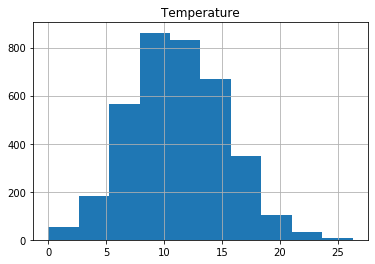

In [41]:
df.hist(grid=True)

#### Check the maximum and minimum values

In [42]:
#Check Data Range
print('Min', np.min(df))
print('Max', np.max(df))

Min Date           1981-01-01
Temperature             0
dtype: object
Max Date           1990-12-31
Temperature          26.3
dtype: object


### Normalize the data

In [0]:
df.drop("Date",axis=1,inplace=True)

In [0]:
from sklearn.preprocessing import MinMaxScaler
#Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)

#### Check the maximum and minimum values of scaled data

In [45]:
#Check Data Range
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


#### Look into some of the scaled values

In [46]:
scaled[0:3]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ]])

### Split data into Training and Testing

In [0]:
#70% examples will used for training (in the begining)
train_size = int(len(scaled) * 0.70)

#30% will be used for Test
test_size = len(scaled - train_size)

In [48]:
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2555
test: 1095


#### Print train and test size

In [49]:
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2555
test: 1095


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
#window - how long the sequence will be
def create_dataset(dataset, window=1):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset)-window):
        
        a = dataset[i:(i+window), 0]        
        dataX.append(a)
        dataY.append(dataset[i + window, 0])
    
    return np.array(dataX), np.array(dataY)


#### Use function to get training and test set

In [0]:
#Create Input and Output
window_size = 3
X_train, y_train = create_dataset(train, window_size)
X_test, y_test = create_dataset(test, window_size)

#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [68]:
#Make it 3 Dimensional Data - needed for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2552, 3, 1)
(1092, 3, 1)


## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [0]:
import tensorflow as tf

In [0]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(window_size, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

### Summarize your model

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [72]:
model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=32)

Train on 2552 samples, validate on 1092 samples
Epoch 1/200
2552/2552 [==============================] - 1s 365us/sample - loss: 0.0426 - val_loss: 0.0122
Epoch 2/200
2552/2552 [==============================] - 0s 139us/sample - loss: 0.0130 - val_loss: 0.0113
Epoch 3/200
2552/2552 [==============================] - 0s 139us/sample - loss: 0.0124 - val_loss: 0.0108
Epoch 4/200
2552/2552 [==============================] - 0s 140us/sample - loss: 0.0121 - val_loss: 0.0104
Epoch 5/200
2552/2552 [==============================] - 0s 138us/sample - loss: 0.0118 - val_loss: 0.0105
Epoch 6/200
2552/2552 [==============================] - 0s 146us/sample - loss: 0.0117 - val_loss: 0.0100
Epoch 7/200
2552/2552 [==============================] - 0s 142us/sample - loss: 0.0116 - val_loss: 0.0099
Epoch 8/200
2552/2552 [==============================] - 0s 144us/sample - loss: 0.0114 - val_loss: 0.0100
Epoch 9/200
2552/2552 [==============================] - 0s 141us/sample - loss: 0.0112 - val_lo

## Make Predictions and Evaluate your model

In [73]:
X_test

array([[[0.58174905],
        [0.54372624],
        [0.51330798]],

       [[0.54372624],
        [0.51330798],
        [0.57034221]],

       [[0.51330798],
        [0.57034221],
        [0.51711027]],

       ...,

       [[0.55513308],
        [0.53231939],
        [0.51711027]],

       [[0.53231939],
        [0.51711027],
        [0.51330798]],

       [[0.51711027],
        [0.51330798],
        [0.59695817]]])

In [74]:
y_predict

array([[0.5532748 ],
       [0.5250256 ],
       [0.50217503],
       ...,
       [0.5050433 ],
       [0.50217503],
       [0.56447506]], dtype=float32)

In [0]:
y_predict=model.predict(X_test)

In [76]:
model.evaluate(X_test,y_predict)

1092/1092 [==============================] - 0s 41us/sample - loss: 1.2137e-15


1.2137218377266593e-15

In [0]:
#Get prediction for both Training and Test Data
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)


In [0]:
#Un-normalize the predited data
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

## Plot the results

In [0]:
import matplotlib.pyplot as plt

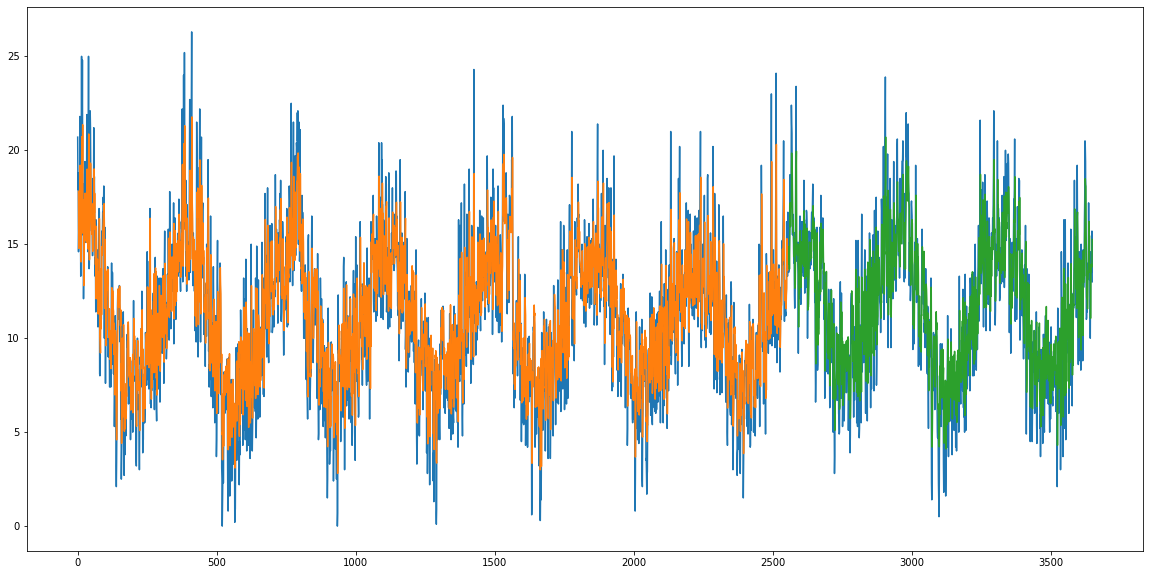

In [79]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window_size:len(trainPredict)+window_size, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(window_size*2):len(scaled), :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()